In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import StandardScaler


In [4]:
df = pd.read_csv("/Users/mac/Desktop/mlbanking/notebook/data/cleaned_transactions.csv")
df_features = df.drop(columns=['TRANSACTION_ID', 'TX_FRAUD', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_FRAUD_SCENARIO'])


In [5]:
# Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(df_features)

In [6]:
your_features = standardized_features
your_labels = df['TX_FRAUD']

In [7]:
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(your_features, your_labels, test_size=0.2, random_state=42)


In [8]:
def evaluate_classification_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    return accuracy, f1, precision, recall

In [9]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

model_list = []
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model



# Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    accuracy_train, f1_train, precision_train, recall_train = evaluate_classification_model(y_train, y_train_pred)
    accuracy_test, f1_test, precision_test, recall_test = evaluate_classification_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(accuracy_train))
    print("- F1 Score: {:.4f}".format(f1_train))
    print("- Precision: {:.4f}".format(precision_train))
    print("- Recall: {:.4f}".format(recall_train))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(accuracy_test))
    print("- F1 Score: {:.4f}".format(f1_test))
    print("- Precision: {:.4f}".format(precision_test))
    print("- Recall: {:.4f}".format(recall_test))

    accuracy_list.append(accuracy_test)
    f1_list.append(f1_test)
    precision_list.append(precision_test)
    recall_list.append(recall_test)

    print('='*35)
    print('\n')    

Logistic Regression
Model performance for Training set
- Accuracy: 0.6169
- F1 Score: 0.5564
- Precision: 0.6605
- Recall: 0.4807
----------------------------------
Model performance for Test set
- Accuracy: 0.6161
- F1 Score: 0.5560
- Precision: 0.6600
- Recall: 0.4804


K-Nearest Neighbors
Model performance for Training set
- Accuracy: 0.9919
- F1 Score: 0.9920
- Precision: 0.9841
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9879
- F1 Score: 0.9881
- Precision: 0.9764
- Recall: 1.0000


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9962
- F1 Score: 0.9963
- Precision: 0.9925
- Recall: 1.0000


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test s

In [23]:
# Insert your code for Decision Tree GridSearchCV here
dt_clf = DecisionTreeClassifier()
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}
grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_test, y_test)
print("Best hyperparameters for Decision Tree: ", grid_search.best_params_)

Best hyperparameters for Decision Tree:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [25]:
import pickle
import pandas as pd

# Assuming 'grid_search' has already been performed

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Finalize the Decision Tree model with the best hyperparameters
final_model = DecisionTreeClassifier(**best_params)

# Train the final model on the entire dataset
final_model.fit(your_features, your_labels)

# Save the model to a file using pickle
with open('final_decision_tree_model.pkl', 'wb') as model_file:
    pickle.dump(final_model, model_file)

# Now, whenever you want to make predictions on new data, you can load the model and use it
# Load the saved model
with open('final_decision_tree_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Convert X_test to a DataFrame before using the drop method
X_test_df = pd.DataFrame(X_test, columns=df_features.columns)

# Ensure that the columns you want to drop exist in the DataFrame
columns_to_drop = ['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_FRAUD_SCENARIO']
columns_to_drop = [col for col in columns_to_drop if col in X_test_df.columns]

# Drop the specified columns
X_test_df = X_test_df.drop(columns=columns_to_drop, errors='ignore')

# Example: Make predictions on new data
new_data_features = scaler.transform(X_test_df)
predictions = loaded_model.predict(new_data_features)

# Create a DataFrame with actual and predicted values
new_data = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': predictions})

# Calculate the Difference column
new_data['Difference'] = new_data['Actual Value'] - new_data['Predicted Value']

# Print or use 'new_data' as needed
print(new_data)


         Actual Value  Predicted Value  Difference
869135              0                0           0
2540999             0                0           0
368418              0                0           0
1132453             0                0           0
1710518             1                0           1
...               ...              ...         ...
823883              1                0           1
1471894             0                0           0
1662627             0                0           0
2603999             0                0           0
3054428             1                0           1

[695790 rows x 3 columns]


In [11]:
# Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2)
model.fit(X_train, y_train)
y_pred_DTC = model.predict(X_test)
acc_DTC = accuracy_score(y_test, y_pred_DTC)
cm_DTC = confusion_matrix(y_test, y_pred_DTC)
print("Decision Tree Classifier:")
print("Accuracy:", acc_DTC)
print("Confusion Matrix:\n", cm_DTC)

Decision Tree Classifier:
Accuracy: 0.9962747380675204
Confusion Matrix:
 [[345036   2592]
 [     0 348162]]


In [12]:
# Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred_RFC = model.predict(X_test)
acc_RFC = accuracy_score(y_test, y_pred_RFC)
cm_RFC = confusion_matrix(y_test, y_pred_RFC)
print("Random Forest Classifier:")
print("Accuracy:", acc_RFC)
print("Confusion Matrix:\n", cm_RFC)

Random Forest Classifier:
Accuracy: 0.9993187599706808
Confusion Matrix:
 [[347154    474]
 [     0 348162]]


Text(0.5, 1.0, 'Confusion Matrix: Decision Tree Classifier')

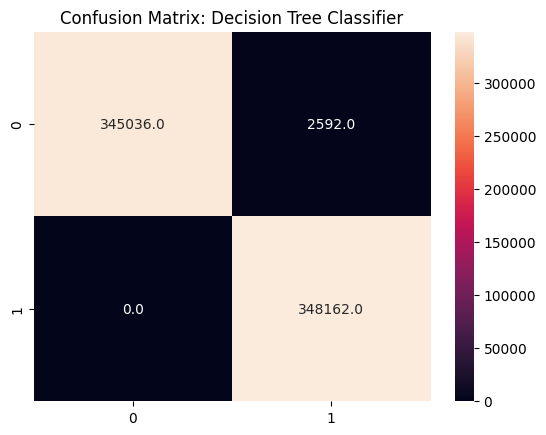

In [13]:
# Create heatmaps for confusion matrices
cm_sns_DTC = sns.heatmap(cm_DTC, annot=True, fmt='.1f')
cm_sns_DTC.set_title('Confusion Matrix: Decision Tree Classifier')

Text(0.5, 1.0, 'Confusion Matrix: Random Forest Classifier')

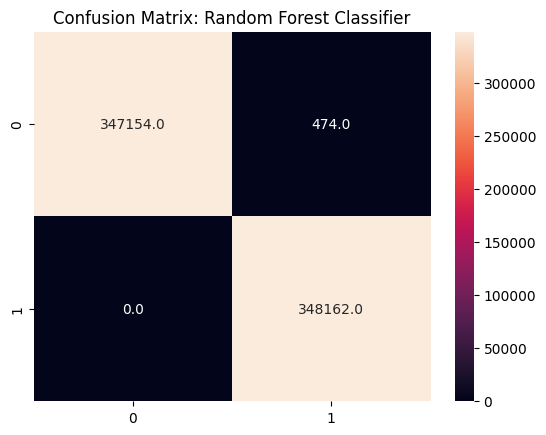

In [14]:
cm_sns_RFC = sns.heatmap(cm_RFC, annot=True, fmt='.1f')
cm_sns_RFC.set_title('Confusion Matrix: Random Forest Classifier')

In [15]:
# Calculate precision, recall, and F1-score
precision_DTC = precision_score(y_test, y_pred_DTC)
recall_DTC = recall_score(y_test, y_pred_DTC)
f1_DTC = f1_score(y_test, y_pred_DTC)
print("Decision Tree Classifier:")
print("Precision: ", precision_DTC)
print("Recall: ", recall_DTC)
print("F1-Score: ", f1_DTC)

Decision Tree Classifier:
Precision:  0.992610205443131
Recall:  1.0
F1-Score:  0.9962913998248717


In [16]:
precision_RFC = precision_score(y_test, y_pred_RFC)
recall_RFC = recall_score(y_test, y_pred_RFC)
f1_RFC = f1_score(y_test, y_pred_RFC)
print("Random Forest Classifier")
print("Precision: ", precision_RFC)
print("Recall: ", recall_RFC)
print("F1-Score: ", f1_RFC)

Random Forest Classifier
Precision:  0.9986404157918287
Recall:  1.0
F1-Score:  0.9993197454642522


In [17]:
# Create a DataFrame for visualization
classifiers = ['Decision Tree Classifier', 'Random Forest Classifier']
metrics = ['Precision', 'Recall', 'F1-Score']

df_vis = pd.DataFrame({
    'Classifier': [classifiers[0]] * 3 + [classifiers[1]] * 3,
    'Metrics': metrics * 2,
    'Score': [precision_DTC, recall_DTC, f1_DTC, precision_RFC, recall_RFC, f1_RFC]
})

In [18]:
fig = px.bar(df_vis, x='Classifier', y='Score', color='Metrics', barmode='group',
             height=400, width=600, title="Classifier Performance Metrics")

fig.update_layout(xaxis=dict(categoryorder='category ascending'))
fig.update_traces(customdata=df_vis['Score'], texttemplate='%{customdata}', textposition='auto', textfont=dict(size=8))
fig.update_traces(text=df_vis['Score'], texttemplate='%{text}', textposition='outside', textfont=dict(size=8))
fig.update_traces(hovertemplate='%{x}<br>Score: %{y:.4f}<extra></extra>')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_traces(text=df_vis['Score'].round(2).astype(str), texttemplate='%{text:.4f}', textposition='outside', textfont=dict(size=8))
fig.show()

In [ ]:
# Assuming 'grid_search' has already been performed

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Finalize the Decision Tree model with the best hyperparameters
final_model = DecisionTreeClassifier(**best_params)

# Train the final model on the entire dataset
final_model.fit(your_features, your_labels)

# Save the model to a file using joblib
import joblib
joblib.dump(final_model, 'final_decision_tree_model.joblib')

# Now, whenever you want to make predictions on new data, you can load the model and use it
# Load the saved model
loaded_model = joblib.load('final_decision_tree_model.joblib')

# Example: Make predictions on new data
new_data = pd.DataFrame(...)  # Replace ... with your new data
new_data_features = scaler.transform(new_data.drop(columns=['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_FRAUD_SCENARIO']))
predictions = loaded_model.predict(new_data_features)

# Print or use 'predictions' as needed
print(predictions)


In [19]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_DTC,'Difference':y_test-y_pred_DTC})
pred_df


,Actual Value,Predicted Value,Difference
869135,0,0,0
2540999,0,0,0
368418,0,0,0
1132453,0,0,0
1710518,1,1,0
...,...,...,...
823883,1,1,0
1471894,0,0,0
1662627,0,0,0
2603999,0,0,0
